# eda - for the observation_based data

spz_Wasserstand_analyse\data\wasserstand\camels_ch\timeseries\observation_based

In [2]:
# Grundlegende Libraries importieren
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot


## Andermatt

| Column Name              | Bedeutung                                                                                               |
|--------------------------|---------------------------------------------------------------------------------------------------------|
| date                     | Datum der Messung.                                                                     |
| discharge_vol (m³/s)     | Gemessener Abfluss (Volumen) des Gewässers in Kubikmeter pro Sekunde.                                  |
| discharge_spec (mm/d)    | Spezifischer Abfluss in Millimeter pro Tag – normierter Abfluss bezogen auf die Fläche des Einzugsgebiets. |
| waterlevel (m)           | Wasserstand im Gewässer in Metern.                                                                     |
| precipitation (mm/d)     | Gemessene Niederschlagsmenge in Millimeter pro Tag.                                                    |
| temperature_min (°C)     | Gemessene minimale Lufttemperatur in Grad Celsius.                                                     |
| temperature_mean (°C)    | Gemessene durchschnittliche Lufttemperatur in Grad Celsius.                                            |
| temperature_max (°C)     | Gemessene maximale Lufttemperatur in Grad Celsius.                                                     |
| rel_sun_dur (%)          | Relative Sonnenscheindauer in Prozent, Verhältnis zur möglichen Sonnenscheindauer.                     |
| swe (mm)                 | Schnee-Wasser-Äquivalent in Millimeter – misst die Wassermenge im Schnee.                              |


In [3]:
df_observation_andermatt = pd.read_csv('../data/wasserstand/camels_ch/timeseries/observation_based/CAMELS_CH_obs_based_2087.csv')

# 'date'-Spalte in datetime-Format umwandeln
df_observation_andermatt['date'] = pd.to_datetime(df_observation_andermatt['date'])

# Als Index setzen
df_observation_andermatt.set_index('date', inplace=True)


df_observation_andermatt

,discharge_vol(m3/s),discharge_spec(mm/d),waterlevel(m),precipitation(mm/d),temperature_min(degC),temperature_mean(degC),temperature_max(degC),rel_sun_dur(%),swe(mm)
date,,,,,,,,,
1981-01-01,1.960,0.890,1426.559,7.96,-13.14,-7.66,-1.06,5.17,NaN
1981-01-02,1.763,0.801,1426.546,11.66,-13.26,-10.12,-3.96,0.44,NaN
1981-01-03,1.827,0.830,1426.550,33.11,-8.13,-3.90,-0.99,25.89,NaN
1981-01-04,1.837,0.835,1426.550,40.16,-13.63,-7.57,-4.23,0.05,NaN
1981-01-05,1.771,0.805,1426.546,12.72,-15.26,-14.08,-13.03,0.04,NaN
...,...,...,...,...,...,...,...,...,...
2020-12-27,2.546,1.157,1426.579,0.85,-12.28,-7.29,-3.80,0.04,218.0
2020-12-28,2.712,1.232,1426.589,0.67,-11.63,-8.97,-7.13,1.82,220.0
2020-12-29,2.616,1.188,1426.583,0.30,-10.72,-8.95,-7.50,0.18,221.0


In [4]:
# Übersicht & Kontrolle
print(df_observation_andermatt.info())
print(df_observation_andermatt.head())

# Fehltage analysieren
df_observation_andermatt.isna().sum()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14610 entries, 1981-01-01 to 2020-12-31
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   discharge_vol(m3/s)     14610 non-null  float64
 1   discharge_spec(mm/d)    14610 non-null  float64
 2   waterlevel(m)           14610 non-null  float64
 3   precipitation(mm/d)     14610 non-null  float64
 4   temperature_min(degC)   14610 non-null  float64
 5   temperature_mean(degC)  14610 non-null  float64
 6   temperature_max(degC)   14610 non-null  float64
 7   rel_sun_dur(%)          14610 non-null  float64
 8   swe(mm)                 8157 non-null   float64
dtypes: float64(9)
memory usage: 1.1 MB
None
            discharge_vol(m3/s)  discharge_spec(mm/d)  waterlevel(m)  \
date                                                                   
1981-01-01                1.960                 0.890       1426.559   
1981-01-02                1.763

discharge_vol(m3/s)          0
discharge_spec(mm/d)         0
waterlevel(m)                0
precipitation(mm/d)          0
temperature_min(degC)        0
temperature_mean(degC)       0
temperature_max(degC)        0
rel_sun_dur(%)               0
swe(mm)                   6453
dtype: int64

In [5]:
# sicherstellen, dass wir für jeden Tag vom 01.01.1981 bis zum 31.12.2018 datenpunkt haben im df
start_date = datetime(1981, 1, 1)
end_date = datetime(2020, 12, 31)

delta = end_date - start_date
print(delta.days+1)

df_observation_andermatt.shape


14610


(14610, 9)

In [6]:
swe = df_observation_andermatt[df_observation_andermatt['swe(mm)'].notna()]
swe

,discharge_vol(m3/s),discharge_spec(mm/d),waterlevel(m),precipitation(mm/d),temperature_min(degC),temperature_mean(degC),temperature_max(degC),rel_sun_dur(%),swe(mm)
date,,,,,,,,,
1998-09-02,4.863,2.209,1426.807,0.08,6.86,10.37,15.08,39.10,0.0
1998-09-03,6.278,2.852,1426.855,17.01,6.08,8.47,12.29,25.30,0.0
1998-09-04,5.020,2.281,1426.814,37.83,4.72,8.19,12.63,43.10,0.0
1998-09-05,15.947,7.245,1427.069,13.04,1.68,4.07,7.50,6.04,0.0
1998-09-06,6.222,2.827,1426.857,0.00,1.37,5.56,10.73,86.75,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,2.546,1.157,1426.579,0.85,-12.28,-7.29,-3.80,0.04,218.0
2020-12-28,2.712,1.232,1426.589,0.67,-11.63,-8.97,-7.13,1.82,220.0
2020-12-29,2.616,1.188,1426.583,0.30,-10.72,-8.95,-7.50,0.18,221.0


- swe(mm) gibt es Daten von 1998-09-02 - 2020-12-31

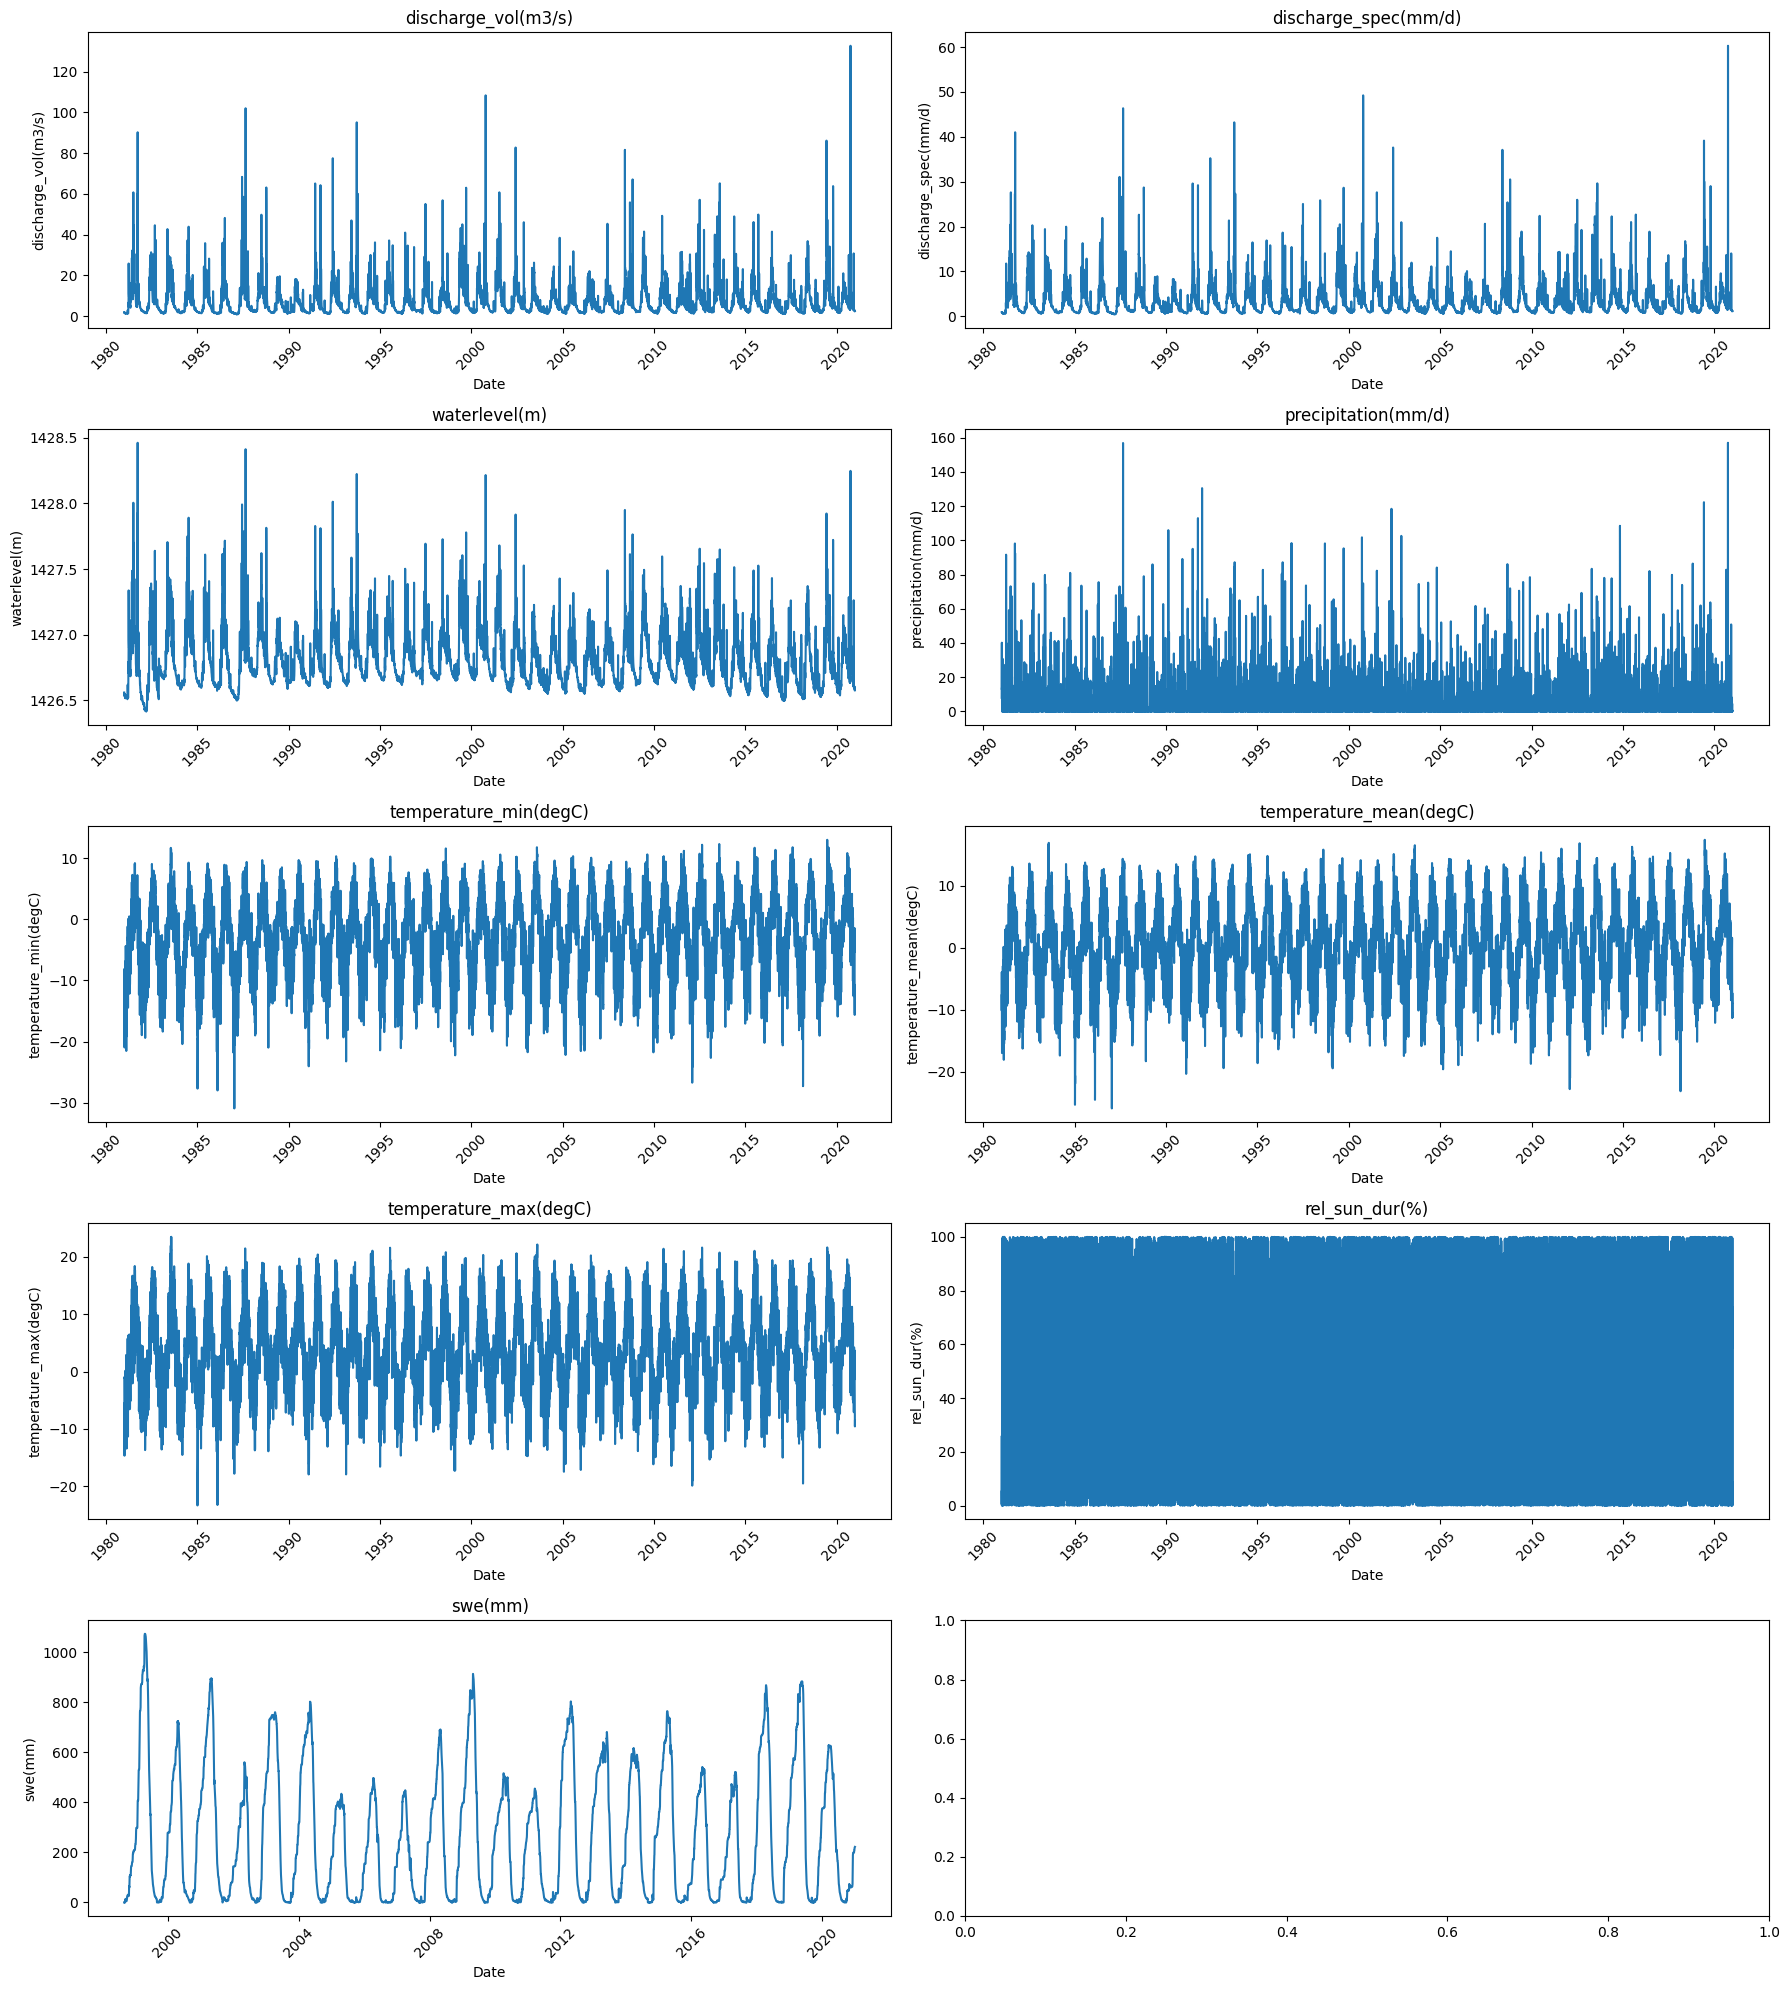

In [7]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 20))
axes = axes.flatten()

for i, col in enumerate(df_observation_andermatt.columns):
    axes[i].plot(df_observation_andermatt.index, df_observation_andermatt[col])
    axes[i].set_title(col)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show();


C:\Users\Sandra\AppData\Local\Temp\ipykernel_29476\1742140414.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = df_observation_andermatt["discharge_vol(m3/s)"].resample("M").mean()


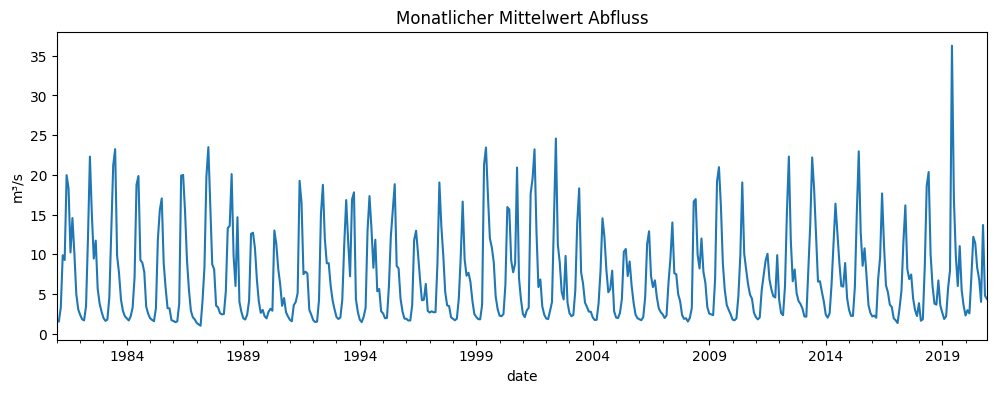

In [8]:
# Monatlicher Mittelwert
monthly_mean = df_observation_andermatt["discharge_vol(m3/s)"].resample("M").mean()

# Plot
monthly_mean.plot(figsize=(12, 4), title="Monatlicher Mittelwert Abfluss")
plt.ylabel("m³/s")
plt.show();

# Zeitreihenanalyse

In [10]:
# Libraries für Zeitreihenanalyse
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf, ccf
from statsmodels.tsa.stattools import adfuller

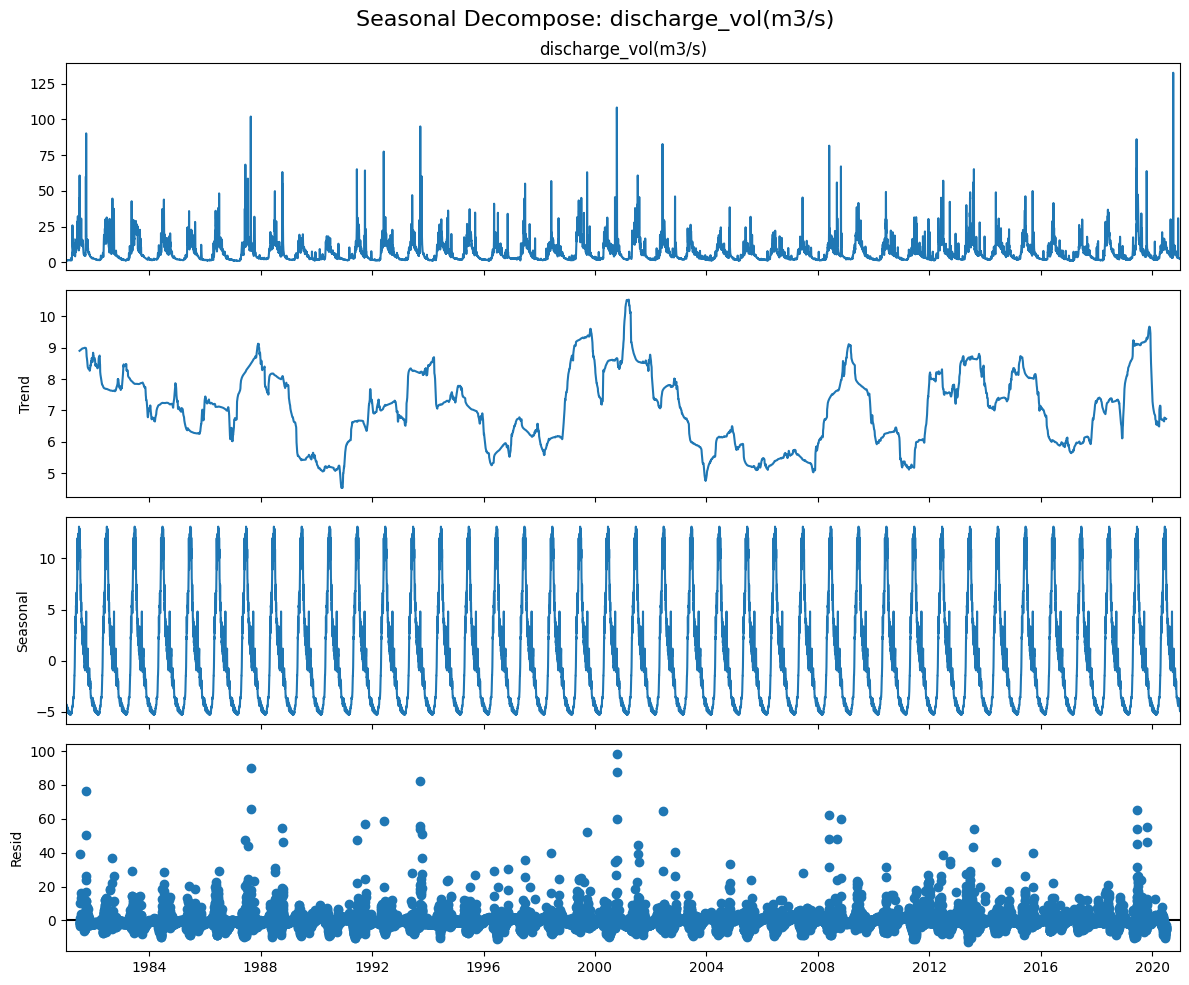

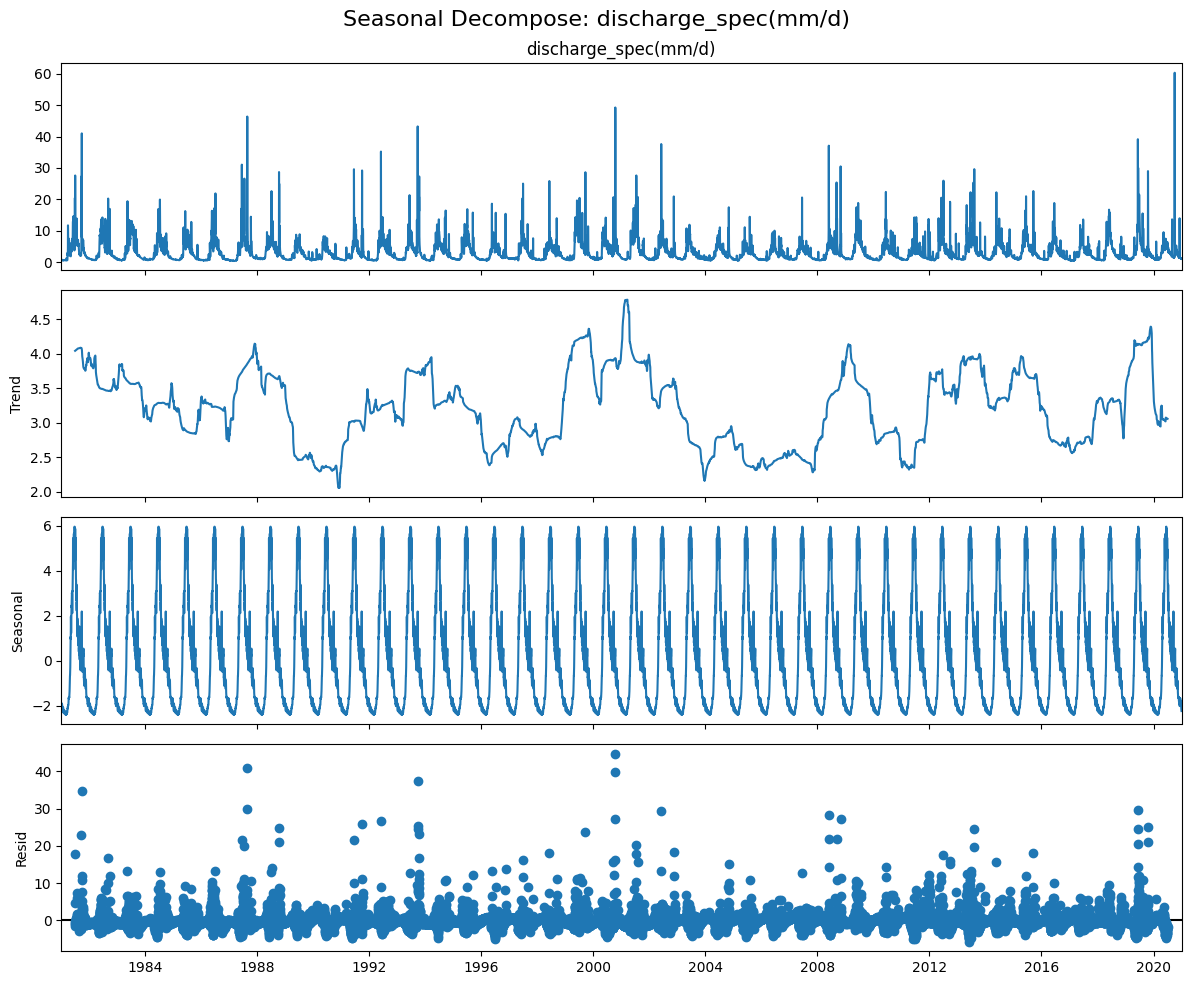

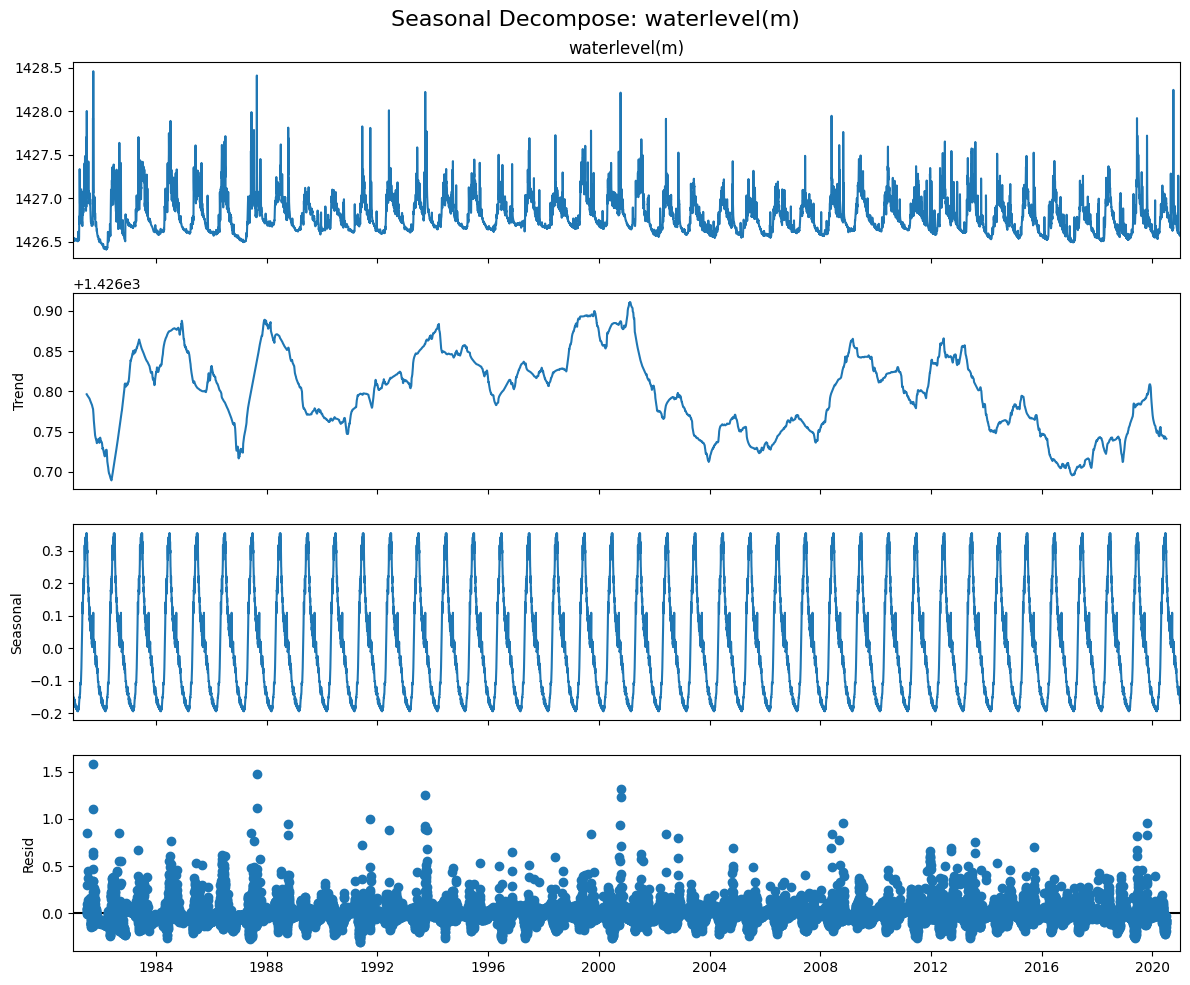

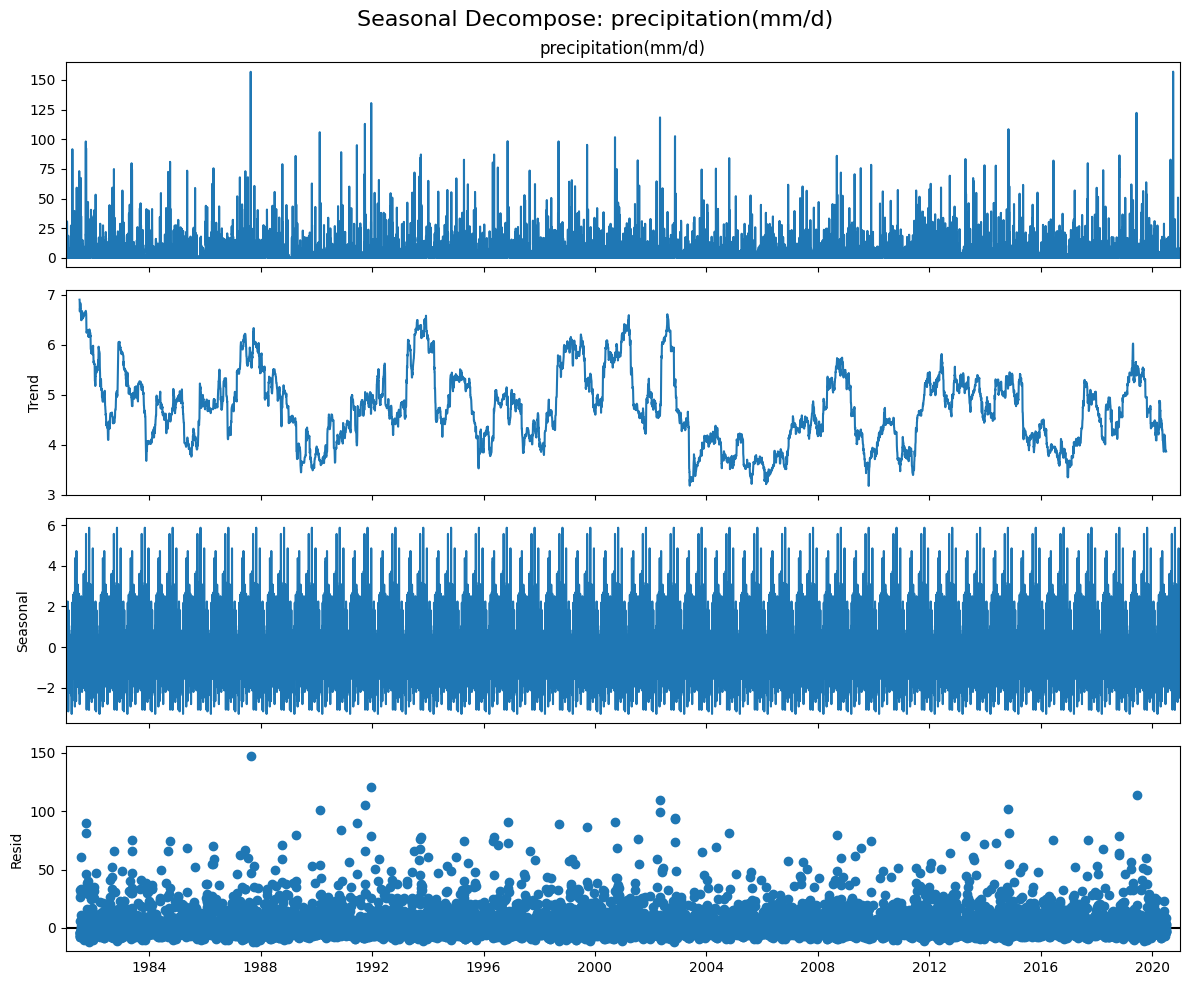

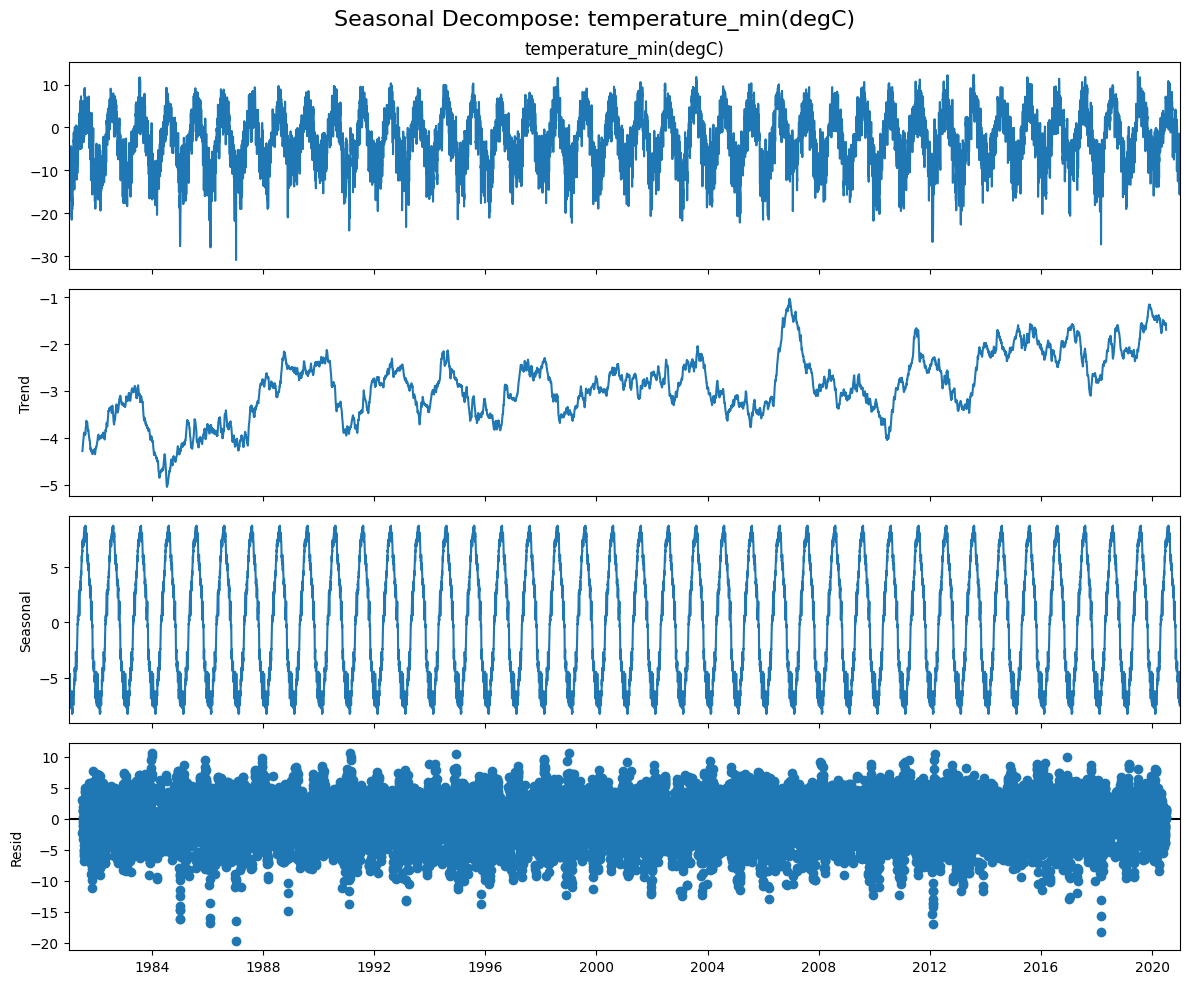

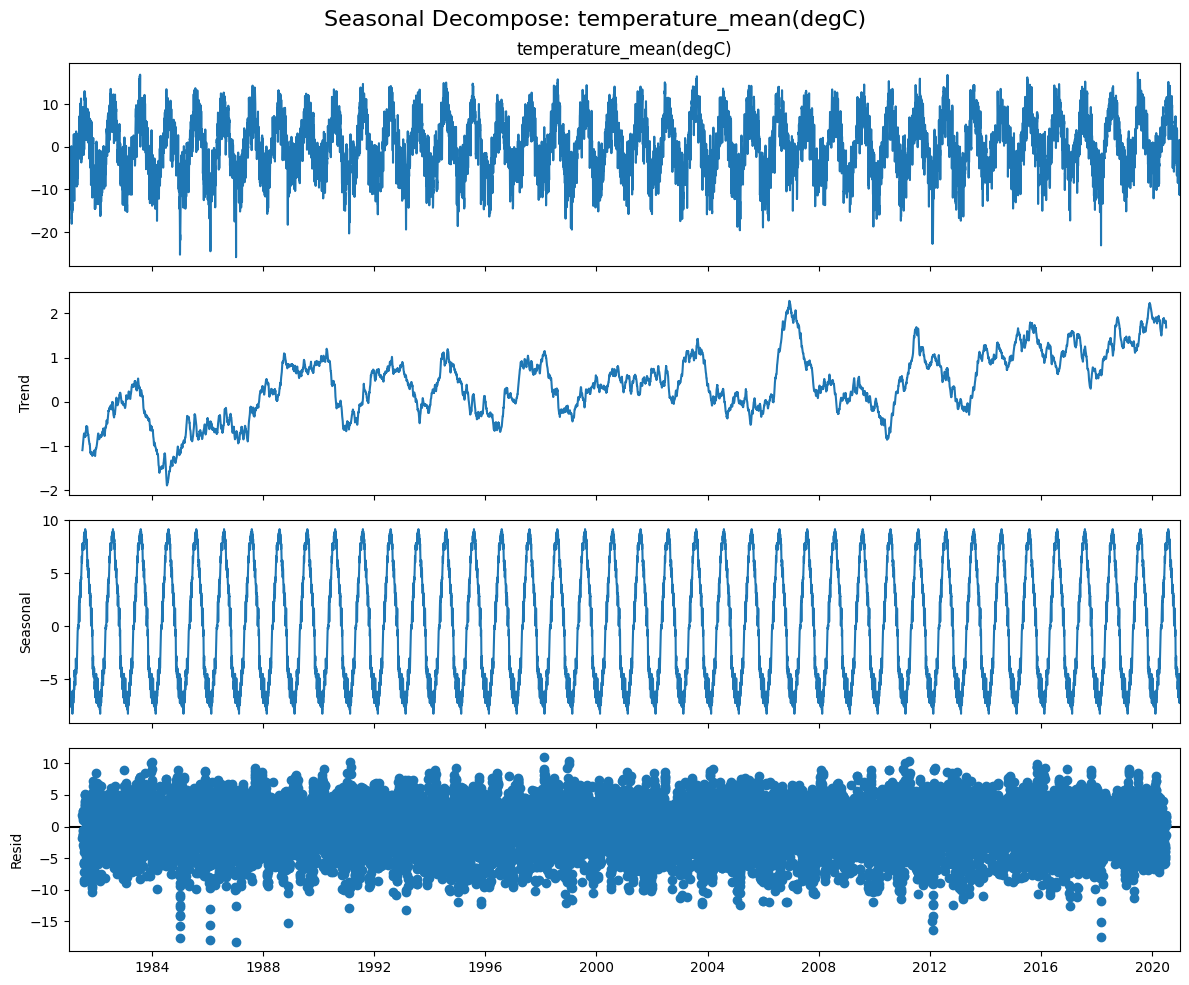

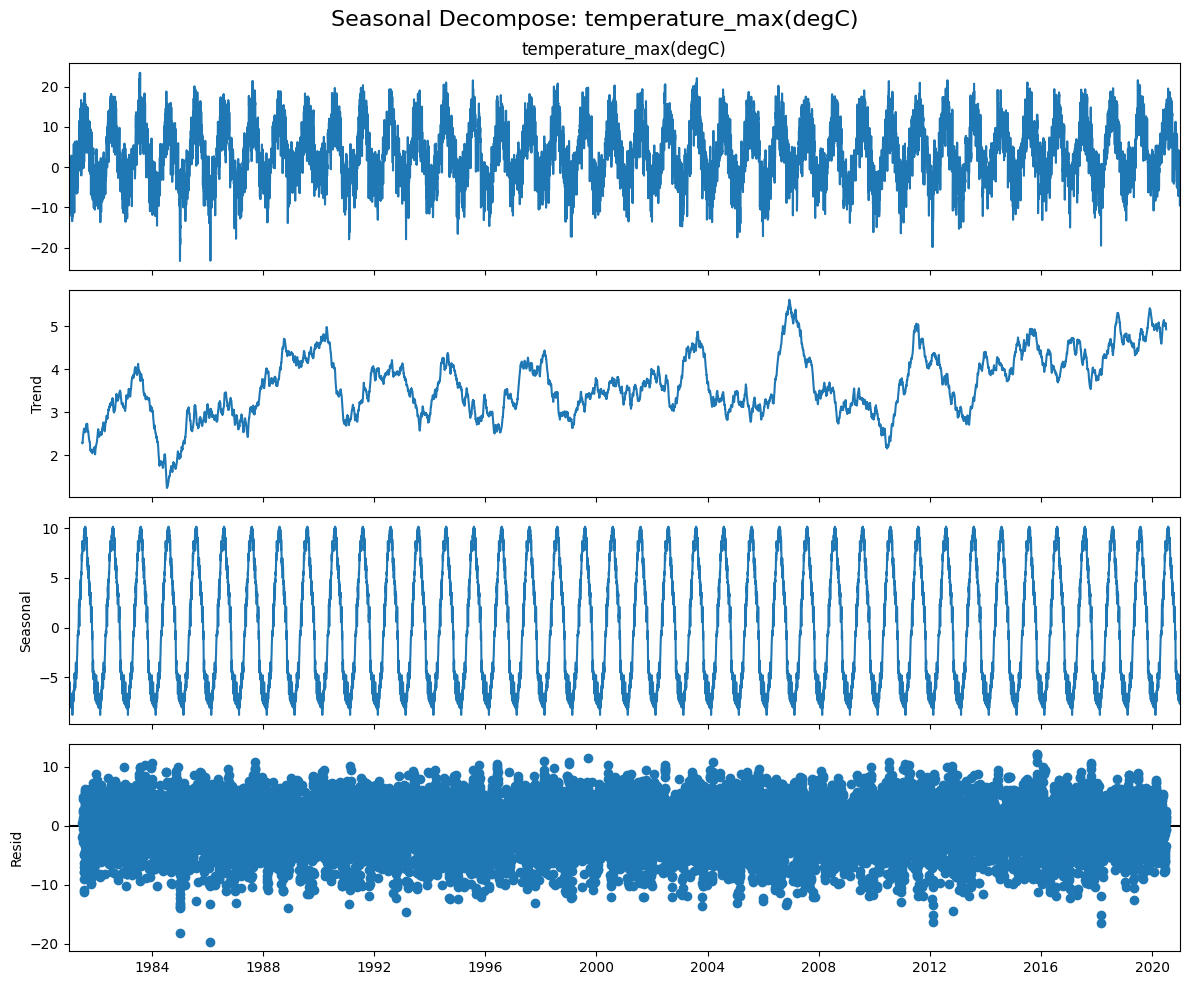

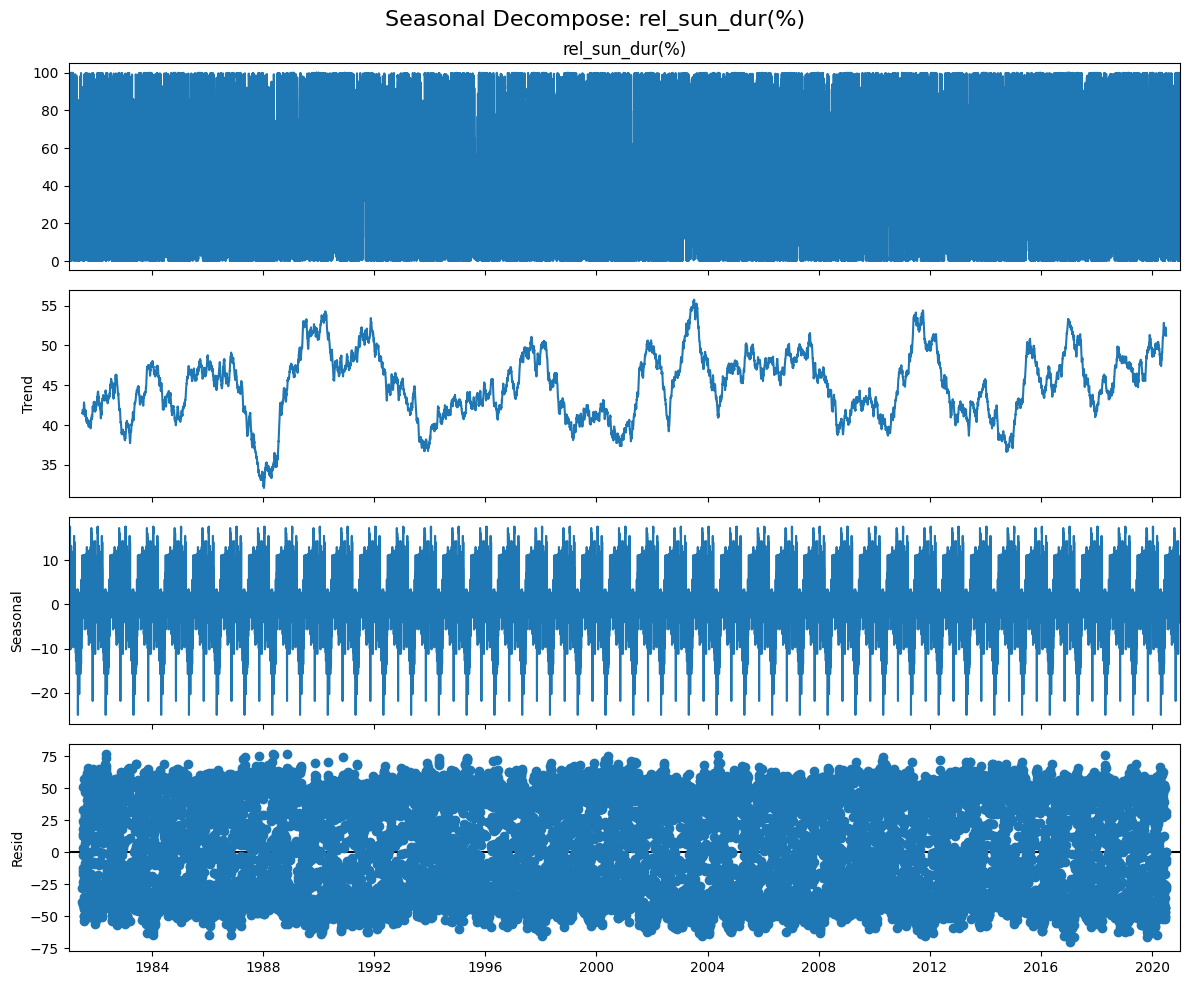

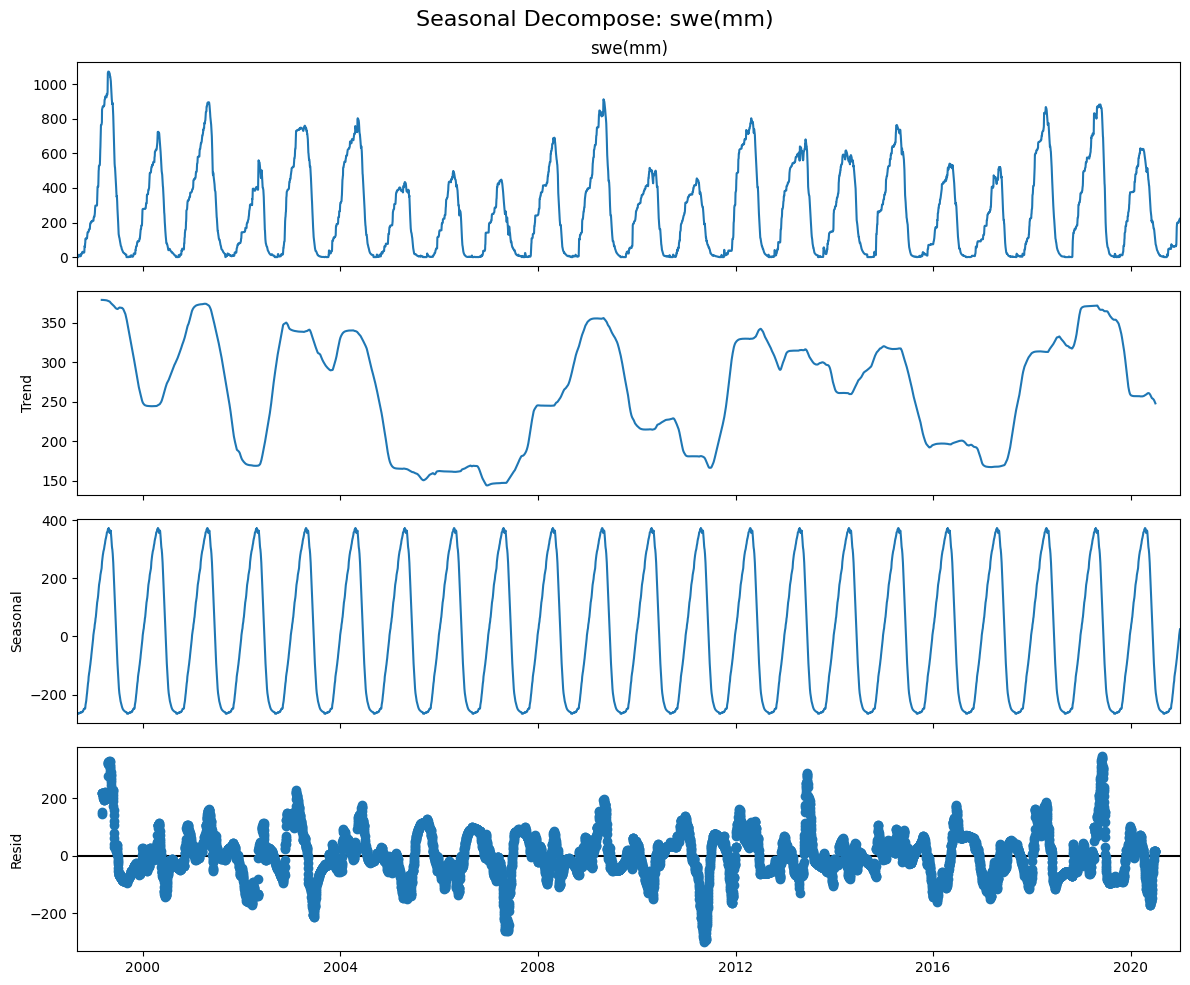

In [11]:
def plot_seasonal_decompose_all(df, period=365):
    for col in df.select_dtypes(include="number").columns:
        try:
            result = seasonal_decompose(df[col].dropna(), model='additive', period=period)
            fig = result.plot()
            fig.suptitle(f'Seasonal Decompose: {col}', fontsize=16)
            fig.set_size_inches(12, 10)
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Fehler bei '{col}': {e}")

# Beispielaufruf:
plot_seasonal_decompose_all(df_observation_andermatt, period=365)


In [12]:
# Weitere Libraries für linearen Trend
from sklearn.linear_model import LinearRegression